In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [3]:
df=pd.read_csv("kaatru.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
df1=df.drop(["instant","dteday","yr","mnth","holiday"],axis=1)
df1.isnull().sum()
df1.shape

(730, 11)

In [5]:
df1.head()

,season,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


<Axes: ylabel='cnt'>

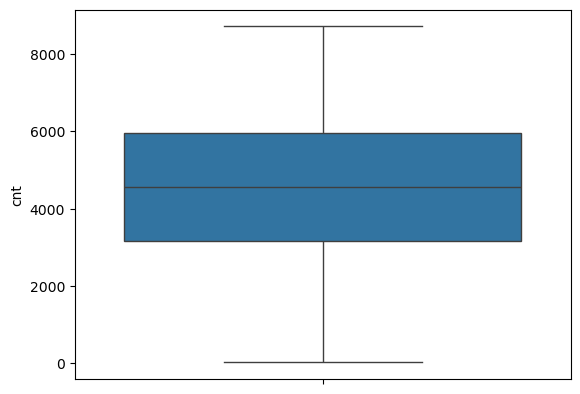

In [7]:
sns.boxplot(df.cnt)

In [8]:
df.cnt=np.log(df.cnt)
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,6.892642
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,6.685861
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,7.207119
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,7.353722
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,7.377759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,7.656337
726,727,28-12-2019,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,8.037543
727,728,29-12-2019,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,7.201171
728,729,30-12-2019,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,7.493317


<Axes: ylabel='cnt'>

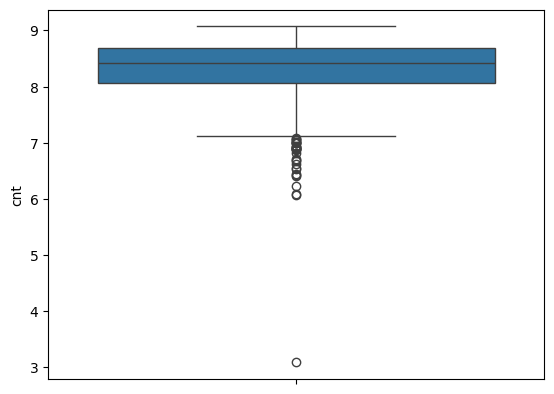

In [9]:
sns.boxplot(df.cnt)

In [10]:
# IQR: Removing outliers
print(df.cnt.count())
Q1=np.percentile(df.cnt,25)
Q3=np.percentile(df.cnt,75)
IQR=Q3-Q1
print("IQR :",IQR)
print("Lower: ",Q1-1.5*IQR)
print("Upper: ",Q3+1.5*IQR)

730
IQR : 0.6324265248973333
Lower:  7.11276142907796
Upper:  9.642467528667293


In [11]:
df=df[(df.cnt>=Q1) & (df.cnt<=Q3)]
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
76,77,18-03-2018,1,0,3,0,0,0,1,22.140000,26.35045,52.5217,15.478139,884,2355,8.083020
92,93,03-04-2018,2,0,4,0,2,1,1,15.511653,18.93835,48.0000,12.208271,1651,1598,8.086103
100,101,11-04-2018,2,0,4,0,3,1,2,24.421732,28.26085,71.6956,21.739758,855,2493,8.116118
103,104,14-04-2018,2,0,4,0,6,0,1,19.167500,23.13710,54.0417,7.416900,529,2738,8.091627
106,107,17-04-2018,2,0,4,0,2,1,1,18.723347,22.28480,47.9583,20.334232,1558,2186,8.227910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,716,17-12-2019,4,1,12,0,2,1,2,16.126653,20.07500,90.7083,6.583306,212,4373,8.430545
716,717,18-12-2019,4,1,12,0,3,1,1,16.844153,20.48540,66.6250,14.834068,433,5124,8.622814
717,718,19-12-2019,4,1,12,0,4,1,1,13.632500,17.10810,62.5417,12.334164,333,4934,8.569216
718,719,20-12-2019,4,1,12,0,5,1,2,13.530000,16.76085,66.7917,8.875021,314,3814,8.325548


<Axes: ylabel='cnt'>

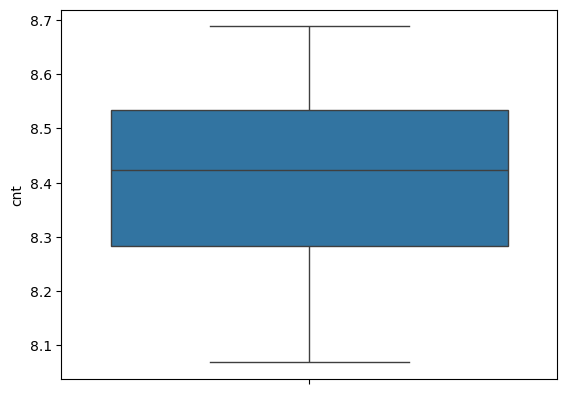

In [12]:
sns.boxplot(df.cnt)

In [13]:
X=df.drop("cnt",axis=1)
y=df[["cnt"]]
y

,cnt
76,8.083020
92,8.086103
100,8.116118
103,8.091627
106,8.227910
...,...
715,8.430545
716,8.622814
717,8.569216
718,8.325548


In [14]:
dr=["instant","dteday","yr","holiday"]
X.drop(dr,axis=1,inplace=True)

In [15]:
X.corr(numeric_only=True)

,season,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered
season,1.000000,0.945941,-0.036319,0.036713,0.054743,0.000172,0.005968,0.196183,-0.245086,0.026475,0.124742
mnth,0.945941,1.000000,-0.027943,0.022545,0.084851,-0.065399,-0.061571,0.210152,-0.230940,-0.022700,0.121902
weekday,-0.036319,-0.027943,1.000000,-0.020494,0.003177,0.019825,0.017973,-0.011136,0.061017,-0.424061,0.337971
workingday,0.036713,0.022545,-0.020494,1.000000,-0.097939,0.021114,0.021272,0.026237,-0.027662,0.156608,-0.030386
weathersit,0.054743,0.084851,0.003177,-0.097939,1.000000,-0.021682,-0.023967,0.571408,-0.018112,-0.118811,-0.032520
temp,0.000172,-0.065399,0.019825,0.021114,-0.021682,1.000000,0.996187,0.158639,-0.064925,0.448030,-0.097147
atemp,0.005968,-0.061571,0.017973,0.021272,-0.023967,0.996187,1.000000,0.171123,-0.087238,0.447141,-0.100903
hum,0.196183,0.210152,-0.011136,0.026237,0.571408,0.158639,0.171123,1.000000,-0.311405,0.043577,-0.144990
windspeed,-0.245086,-0.230940,0.061017,-0.027662,-0.018112,-0.064925,-0.087238,-0.311405,1.000000,-0.110100,0.063298
casual,0.026475,-0.022700,-0.424061,0.156608,-0.118811,0.448030,0.447141,0.043577,-0.110100,1.000000,-0.360972


In [16]:
# The correlation between temp and atemp is around 1, so they are more correlated. Dropping atemp column
X.drop("atemp",axis=1,inplace=True)
X.describe()

,season,mnth,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered
count,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000
mean,2.758242,7.101648,2.983516,0.697802,1.354396,21.604735,63.310814,12.493546,809.392857,3715.065934
std,1.045422,3.236857,1.991650,0.459843,0.490356,6.889788,13.414927,4.992401,518.419719,722.729797
min,1.000000,1.000000,0.000000,0.000000,1.000000,7.790000,27.583300,1.500244,94.000000,1598.000000
25%,2.000000,5.000000,1.000000,0.000000,1.000000,15.152913,53.416650,9.041918,439.750000,3228.750000
50%,3.000000,7.000000,3.000000,1.000000,1.000000,21.730000,63.354200,11.958797,699.000000,3691.500000
75%,4.000000,10.000000,5.000000,1.000000,2.000000,27.640827,72.927100,15.333486,968.250000,4142.750000
max,4.000000,12.000000,6.000000,1.000000,3.000000,35.328347,92.500000,29.584721,2613.000000,5398.000000


In [17]:
X.describe()

,season,mnth,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered
count,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000
mean,2.758242,7.101648,2.983516,0.697802,1.354396,21.604735,63.310814,12.493546,809.392857,3715.065934
std,1.045422,3.236857,1.991650,0.459843,0.490356,6.889788,13.414927,4.992401,518.419719,722.729797
min,1.000000,1.000000,0.000000,0.000000,1.000000,7.790000,27.583300,1.500244,94.000000,1598.000000
25%,2.000000,5.000000,1.000000,0.000000,1.000000,15.152913,53.416650,9.041918,439.750000,3228.750000
50%,3.000000,7.000000,3.000000,1.000000,1.000000,21.730000,63.354200,11.958797,699.000000,3691.500000
75%,4.000000,10.000000,5.000000,1.000000,2.000000,27.640827,72.927100,15.333486,968.250000,4142.750000
max,4.000000,12.000000,6.000000,1.000000,3.000000,35.328347,92.500000,29.584721,2613.000000,5398.000000


In [18]:
#Standardize all columns
Columns=['temp','hum', 'windspeed', 'casual', 'registered']
import scipy
print(Columns)
for i in Columns:
    X[i]=scipy.stats.zscore(X[i]) 
X

['temp', 'hum', 'windspeed', 'casual', 'registered']


,season,mnth,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered
76,1,3,0,0,1,0.077797,-0.805369,0.598650,0.144111,-1.884436
92,2,4,2,1,1,-0.885582,-1.142898,-0.057220,1.625643,-2.933295
100,2,4,3,1,2,0.409428,0.625894,1.854607,0.088094,-1.693230
103,2,4,6,0,1,-0.354233,-0.691906,-1.018274,-0.541605,-1.353771
106,2,4,2,1,1,-0.418787,-1.146010,1.572686,1.446005,-2.118593
...,...,...,...,...,...,...,...,...,...,...
715,4,12,2,1,2,-0.796196,2.045125,-1.185477,-1.153921,0.911599
716,4,12,3,1,1,-0.691913,0.247392,0.469462,-0.727038,1.952145
717,4,12,4,1,1,-1.158702,-0.057412,-0.031969,-0.920198,1.688891
718,4,12,5,1,2,-1.173599,0.259836,-0.725804,-0.956898,0.137078


In [19]:
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(X,y,train_size=0.7,random_state=0)

In [20]:
ols_formula="cnt~ temp +hum+windspeed+casual+registered+C(season)+C(weekday)+C(workingday)+C(weathersit)"

In [21]:
ols_data=pd.concat([X_train,y_train],axis=1)
ols_data

,season,mnth,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
259,3,9,1,1,2,-0.210221,0.636173,0.043060,1.206487,-0.884071,8.414274
456,2,4,2,1,1,-0.554379,-0.961149,1.688838,0.769947,1.403468,8.688791
466,2,4,5,1,1,-0.771365,-1.245536,1.397080,-0.282772,1.428408,8.595820
287,4,10,1,1,1,-0.120836,-1.118018,0.962387,2.104679,-0.550154,8.559678
450,2,3,3,1,1,-1.213328,-2.561180,0.009692,-0.537742,1.185937,8.537388
...,...,...,...,...,...,...,...,...,...,...,...
670,4,11,6,0,1,-1.024624,-0.828763,1.071134,-0.369693,2.097628,8.673684
309,4,11,2,1,1,-1.064352,0.757474,-1.268853,0.275459,-1.410579,8.202208
222,3,8,6,0,1,1.135524,-1.562784,-0.291285,0.005036,0.367079,8.474703
151,2,6,5,1,2,1.413614,0.328257,0.277125,-0.572511,-0.352020,8.287528


In [22]:
ols_data.describe()

,season,mnth,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
count,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000
mean,2.807087,7.181102,3.035433,0.696850,1.374016,-0.061545,0.038218,-0.037991,0.010116,0.006100,8.406702
std,1.058650,3.314640,2.026193,0.460527,0.492908,0.995542,1.007485,1.002662,1.034420,1.000369,0.160678
min,1.000000,1.000000,0.000000,0.000000,1.000000,-2.007863,-2.666931,-2.205038,-1.381849,-2.933295,8.075272
25%,2.000000,5.000000,1.000000,0.000000,1.000000,-1.007243,-0.704352,-0.711028,-0.714483,-0.645410,8.292845
50%,3.000000,7.000000,3.000000,1.000000,1.000000,-0.088559,0.076329,-0.132371,-0.224824,-0.070062,8.421783
75%,4.000000,10.000000,5.000000,1.000000,2.000000,0.820190,0.722485,0.517395,0.395218,0.561748,8.533212
max,4.000000,12.000000,6.000000,1.000000,3.000000,1.994619,2.160207,3.428150,3.483837,2.331785,8.688791


<Axes: ylabel='Density'>

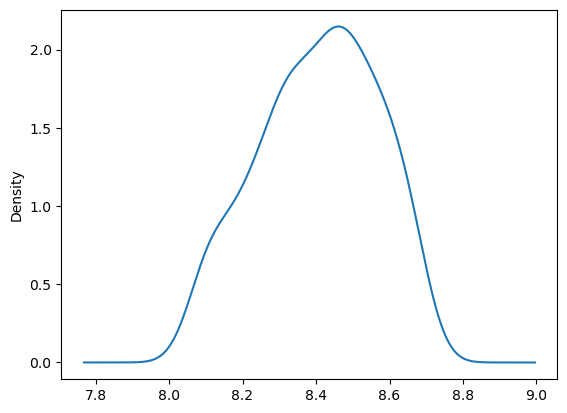

In [23]:
ols_data.cnt.plot(kind="kde")

In [24]:
from statsmodels.formula.api import ols
OLS=ols(formula=ols_formula,data=ols_data)
model=OLS.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     2275.
Date:                Mon, 09 Dec 2024   Prob (F-statistic):          7.34e-251
Time:                        22:52:50   Log-Likelihood:                 752.84
No. Observations:                 254   AIC:                            -1470.
Df Residuals:                     236   BIC:                            -1406.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              8.4079      0.004   2348.488      0.000       8.401       8.415
C(season)[T.2]        -0.0028      0.003     -0.813      0.417      -0.009       0.004
C(season)[T.3]        -0.0031      0.004     -0.731      0.465      -0.011       0.005
C(season)[T.4]        -0.0028      0.003     -0.990      0.323      -0.008       0.003
C(weekday)[T.1]       -0.0062      0.010     -0.596      0.552      -0.027       0.014
C(weekday)[T.2]       -0.0077      0.010     -0.781      0.436      -0.027       0.012
C(weekday)[T.3]       -0.0015      0.010     -0.150      0.881      -0.021       0.018
C(weekday)[T.4]        0.0033      0.010      0.327      0.744      -0.016       0.023
C(weekday)[T.5]        0.0015      0.010      0.147      0.883      -0.018       0.021
C(weekday)[T.6]        0.0001      0.003      0.042      0.967      -0.006       0.006
C(workingday)[T.1]     0.0016      0.009      0.172      0.864      -0.017       0.020
C(weathersit)[T.2]    -0.0013      0.002     -0.625      0.533      -0.006       0.003
C(weathersit)[T.3]     0.0062      0.014      0.458      0.647      -0.021       0.033
temp                   0.0029      0.002      1.822      0.070      -0.000       0.006
hum                    0.0023      0.001      2.048      0.042    8.73e-05       0.005
windspeed             -0.0005      0.001     -0.546      0.586      -0.002       0.001
casual                 0.1168      0.001     84.896      0.000       0.114       0.119
registered             0.1610      0.001    165.397      0.000       0.159       0.163
==============================================================================
Omnibus:                       38.248   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.979
Skew:                          -1.075   Prob(JB):                     8.51e-12
Kurtosis:                       3.440   Cond. No.                         42.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
y_pred=model.predict(X_test)
y_pred

565    8.709440
425    8.106246
149    8.315307
130    8.331927
352    8.149669
         ...   
537    8.698302
264    8.470100
391    8.165971
221    8.465594
208    8.378032
Length: 110, dtype: float64

In [26]:
y_test

,cnt
565,8.677610
425,8.069029
149,8.318254
130,8.338545
352,8.132413
...,...
537,8.669571
264,8.475329
391,8.147867
221,8.472196


<Axes: ylabel='Density'>

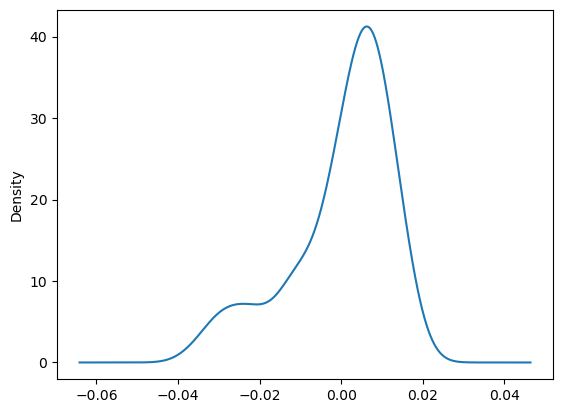

In [27]:
model.resid.plot(kind="kde")

hum,casual,registered  are the 3 features which were shown some positive relationship with cnt and p value is <=0.05.
So, hum,casual,registered variables that are significant in the demand for shared bikes cnt.

R-squared: 	0.994 i.e the independent variables explains 99.4% of dependent variable.
Adj. R-squared: 	0.993